<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Display column names, data types, and summary information
print("Column Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nSummary Information:")
df.info()
print("\nDataset Shape:", df.shape)

Column Names:
 ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncW

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# Identify missing values
print("Missing Values per Column:\n", df.isnull().sum())

# Impute missing values for key columns with mode (categorical) or median (numeric)
for column in ['Employment', 'JobSat', 'YearsCodePro']:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

# Verify missing values are handled
print("\nMissing Values After Imputation:\n", df[['Employment', 'JobSat', 'YearsCodePro']].isnull().sum())

Missing Values per Column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing Values After Imputation:
 Employment      0
JobSat          0
YearsCodePro    0
dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
# Calculate value counts for key columns
print("Employment Distribution:\n", df['Employment'].value_counts())
print("\nJob Satisfaction Distribution:\n", df['JobSat'].value_counts())
print("\nYearsCodePro Distribution:\n", df['YearsCodePro'].value_counts(dropna=False))

# Convert YearsCodePro to numeric for further analysis
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

Employment Distribution:
 Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking f

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


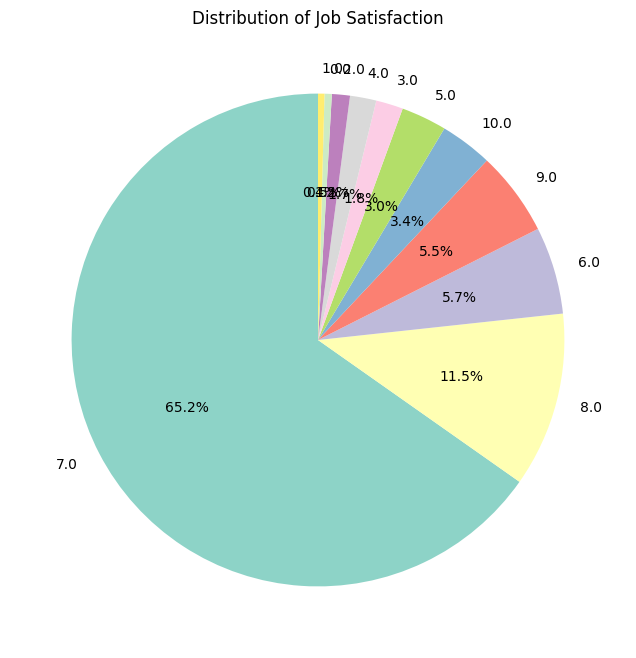

Interpretation: The pie chart shows the proportion of respondents across different job satisfaction levels. A larger segment indicates higher frequency of that satisfaction level among developers.


In [6]:
## Write your code here
# Pie chart for JobSat distribution
plt.figure(figsize=(8, 8))
df['JobSat'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Job Satisfaction')
plt.ylabel('')  # Remove y-label for cleaner look
plt.show()

# Interpretation
print("Interpretation: The pie chart shows the proportion of respondents across different job satisfaction levels. "
      "A larger segment indicates higher frequency of that satisfaction level among developers.")

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


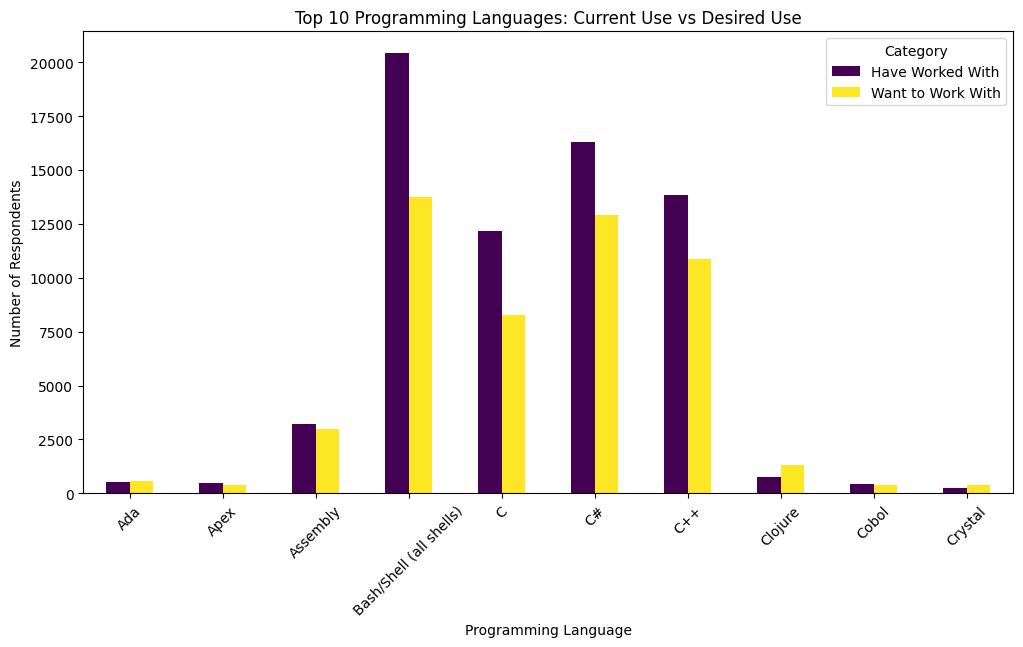

In [7]:
## Write your code here
# Split and count languages in LanguageHaveWorkedWith and LanguageWantToWorkWith
langs_worked = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()
langs_want = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack().value_counts()

# Combine into a DataFrame for comparison
lang_comparison = pd.DataFrame({'Have Worked With': langs_worked, 'Want to Work With': langs_want}).fillna(0)
lang_comparison = lang_comparison.head(10)  # Top 10 languages

# Grouped bar chart
lang_comparison.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Top 10 Programming Languages: Current Use vs Desired Use')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1200x600 with 0 Axes>

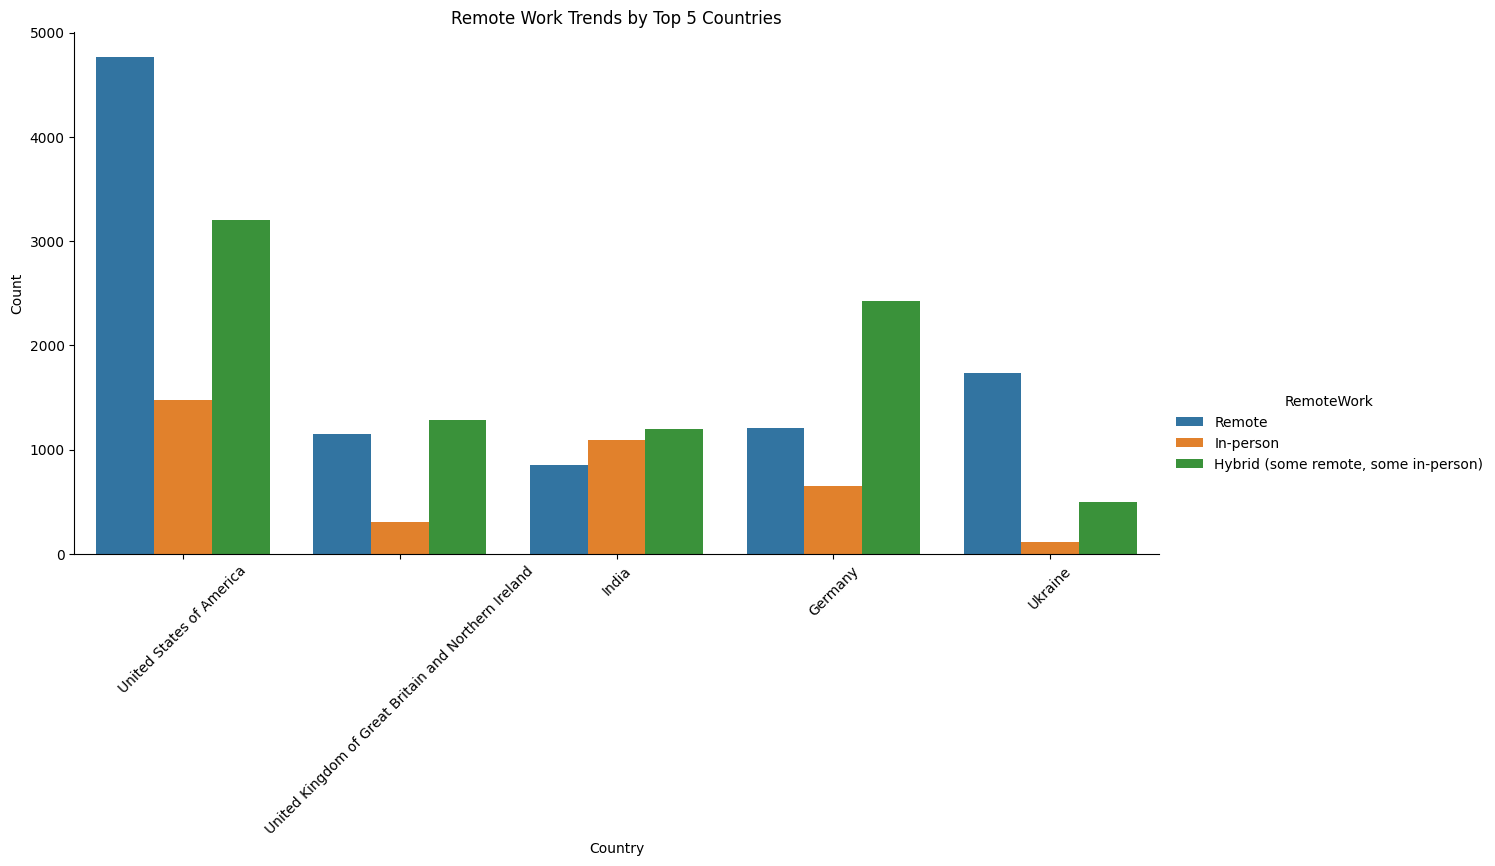

In [8]:
## Write your code here
# Group RemoteWork by Country (top 5 countries for simplicity)
top_countries = df['Country'].value_counts().head(5).index
df_top = df[df['Country'].isin(top_countries)]

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.catplot(data=df_top, x='Country', hue='RemoteWork', kind='count', height=6, aspect=2)
plt.title('Remote Work Trends by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Spearman Correlation between YearsCodePro and JobSat: nan


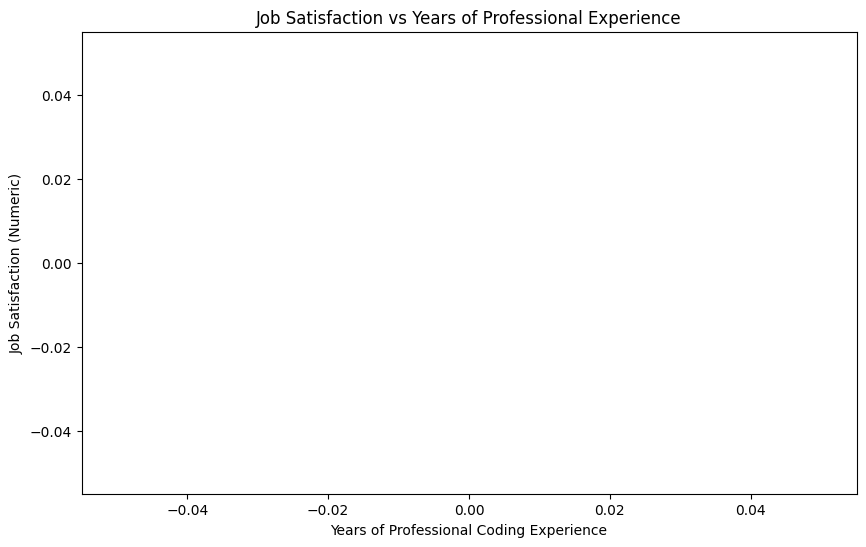

In [9]:
## Write your code here
# Convert JobSat to numeric scale if categorical (example mapping)
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSatNumeric'] = df['JobSat'].map(job_sat_mapping)

# Calculate Spearman correlation (suitable for ordinal data)
correlation = df['YearsCodePro'].corr(df['JobSatNumeric'], method='spearman')
print(f"Spearman Correlation between YearsCodePro and JobSat: {correlation:.2f}")

# Scatter plot for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatNumeric', alpha=0.5)
plt.title('Job Satisfaction vs Years of Professional Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Numeric)')
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Employment vs Education Level (%):
 EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                            2.899384   
Employed, full-time;Employed, part-time                                        4.591837   
Employed, full-time;Independent contractor, fre...                             3.108189   
Employed, full-time;Independent contractor, fre...                             6.547619   
Employed, full-time;Independent contractor, fre...                             0.000000   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                             0.000000   
Student, full-time;Student, part-time;Retired                                  0.000000   
Student, part-time                                    

/tmp/ipykernel_1656/3917252125.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


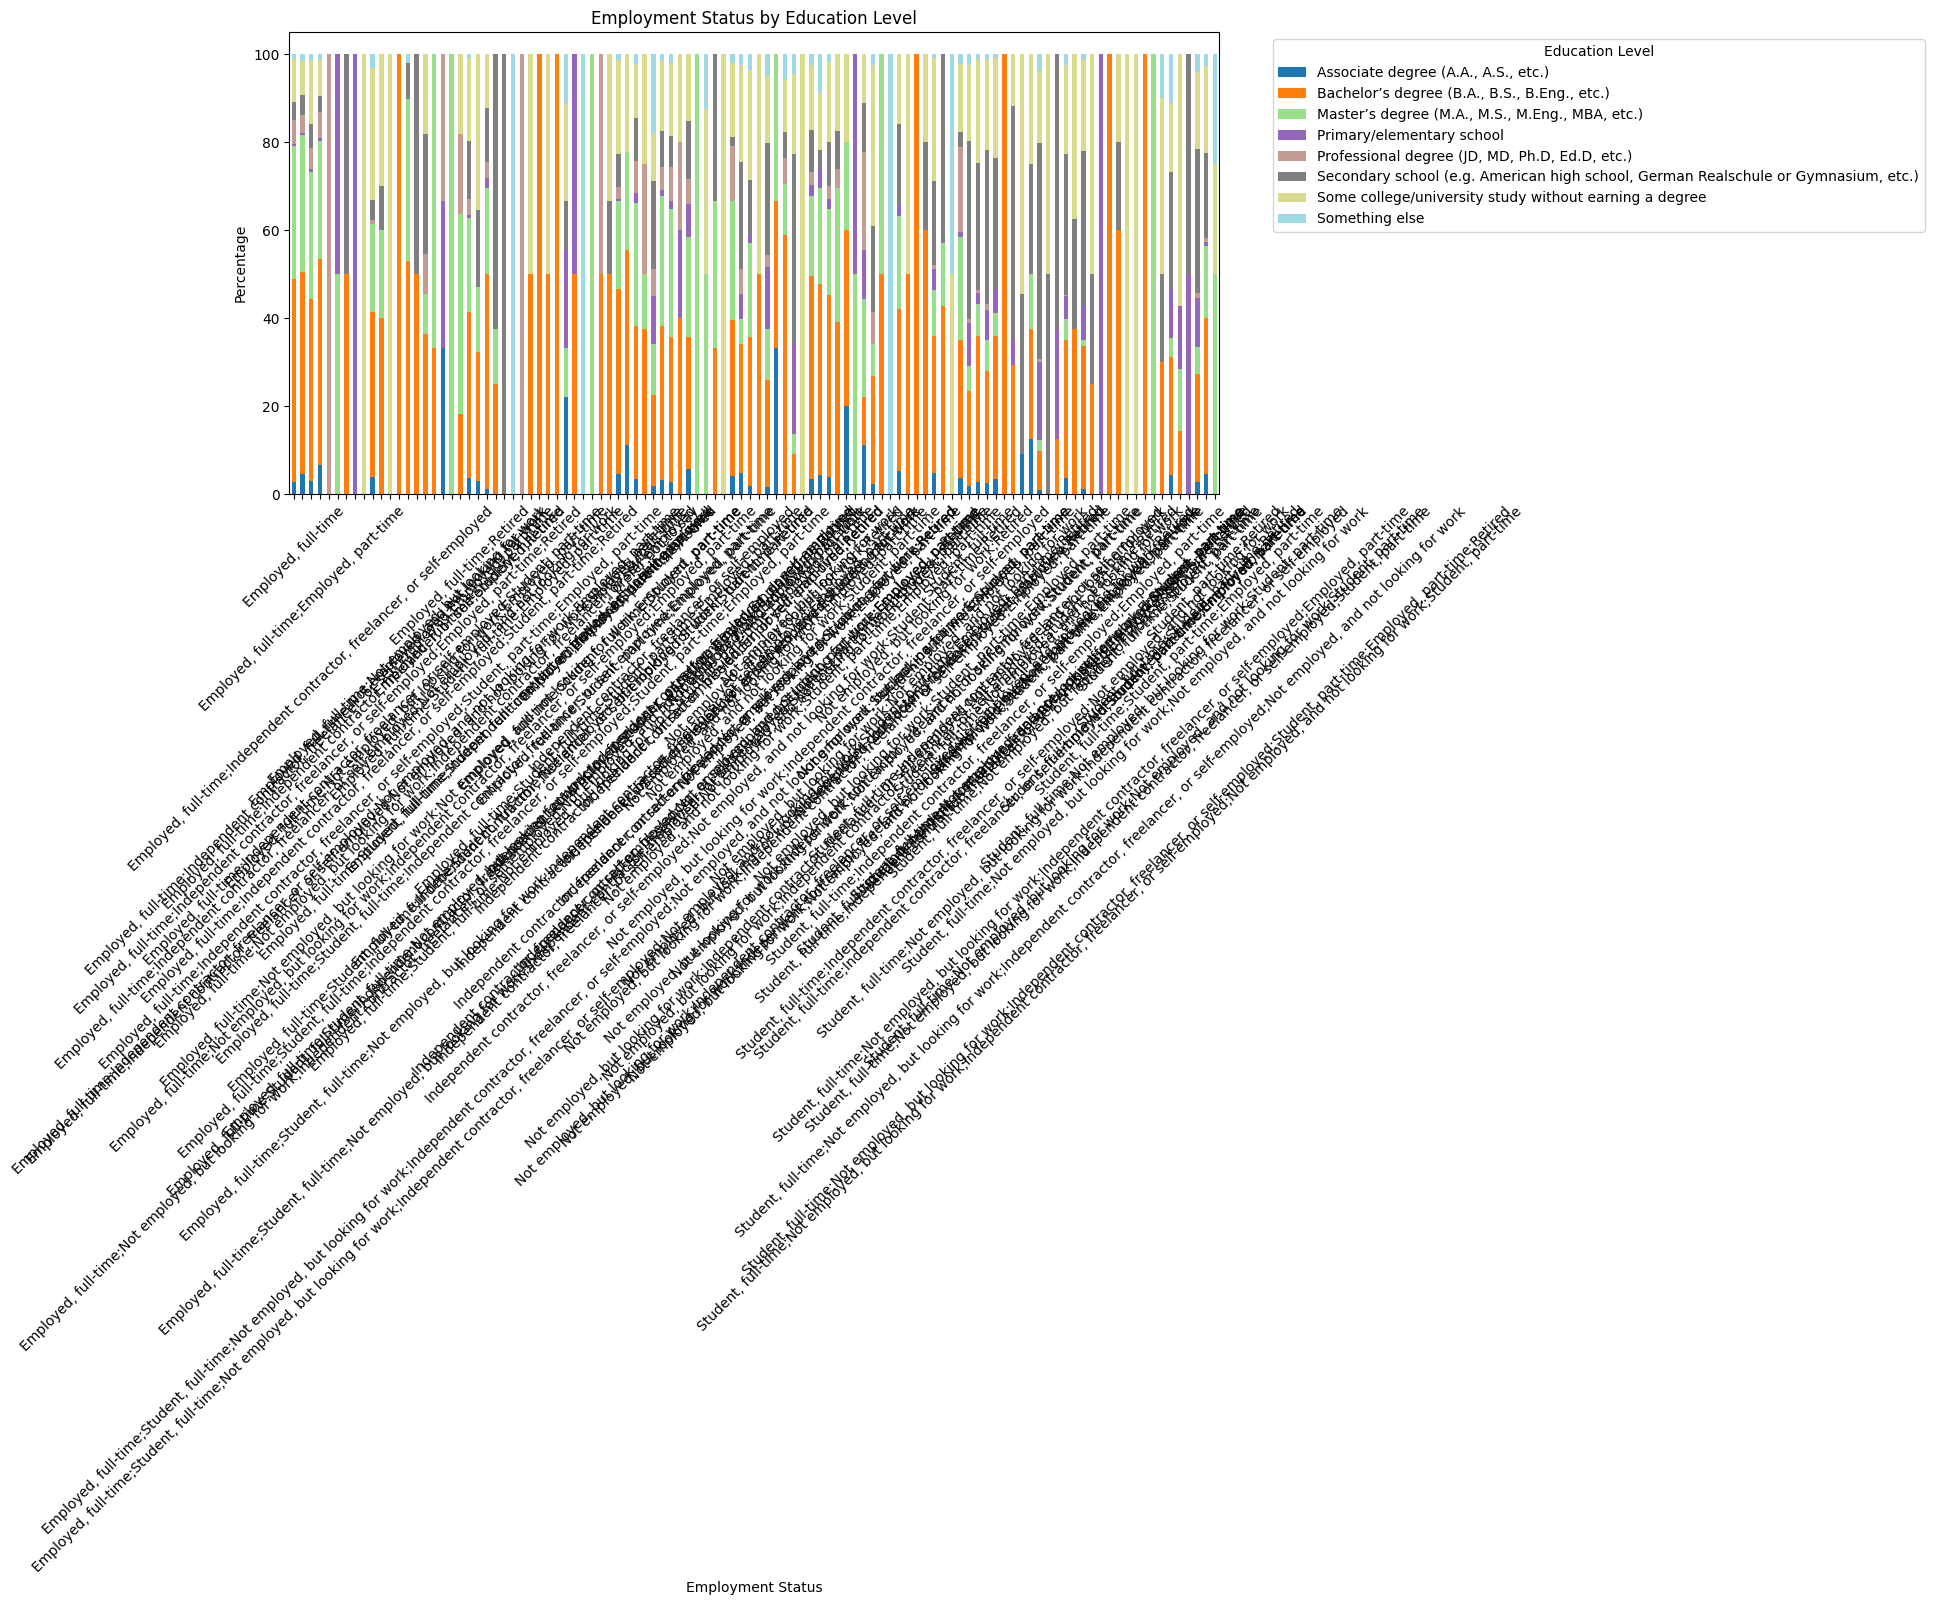

In [10]:
## Write your code here
# Create cross-tabulation
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'], normalize='index') * 100
print("Employment vs Education Level (%):\n", cross_tab)

# Stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Employment Status by Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [11]:
## Write your code here
# Save the cleaned dataset to a CSV file
df.to_csv('survey_data_cleaned.csv', index=False)
print("Cleaned dataset saved as 'survey_data_cleaned.csv'")

Cleaned dataset saved as 'survey_data_cleaned.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
